# 作業

- 作業目標 : iris (dataset.load_iris()) 資料嘗試跑 kmeans (可以測試不同的群數 , init 等)

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

### 載入 相關套件 並 執行 kmean 實驗 ...

- 實驗測試不同的群數
- 實驗測試不同的初始值
- 呈現結果

### Import pkg

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans

np.random.seed(5)

%matplotlib inline

### 看X跟y資料

In [3]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

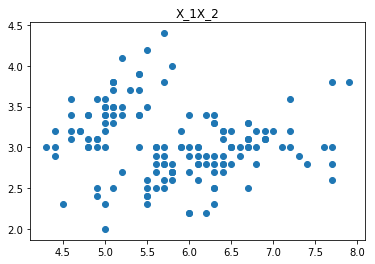

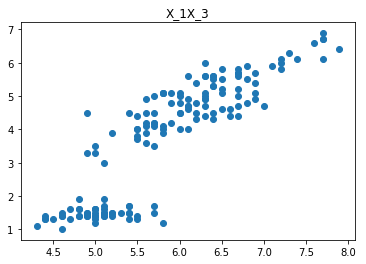

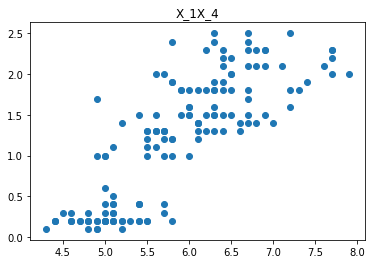

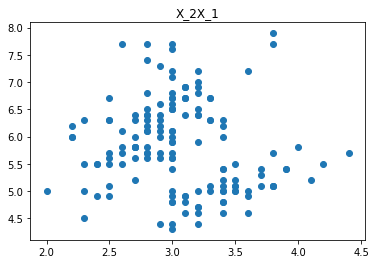

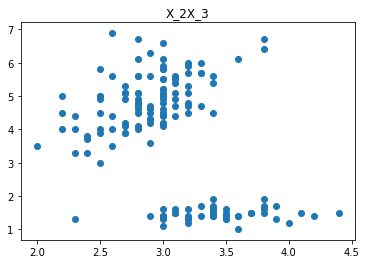

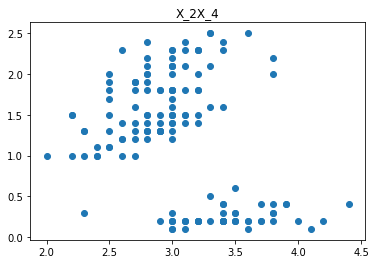

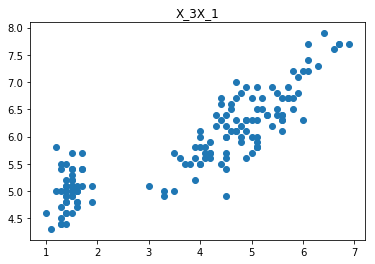

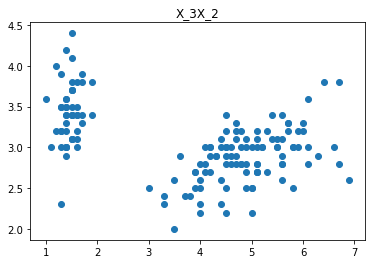

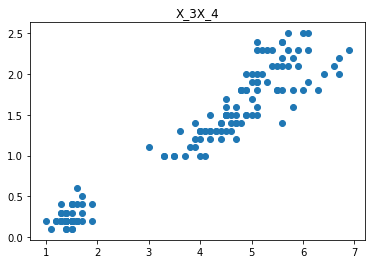

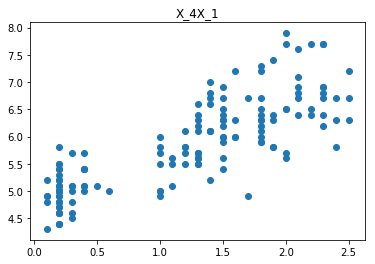

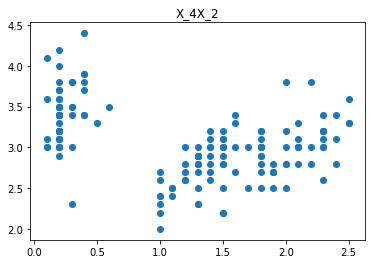

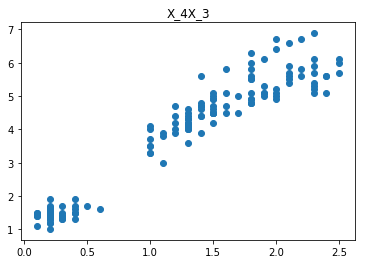

In [4]:
X_1 = []
X_2 = []
X_3 = []
X_4 = []

for i in range(len(X)):
    X_1.append(X[i][0])
    X_2.append(X[i][1])
    X_3.append(X[i][2])
    X_4.append(X[i][3])
X_label = [X_1, X_2, X_3, X_4]
X_title = ["X_1", "X_2", "X_3", "X_4"]
for x, t1 in zip(X_label, X_title):
    for y, t2 in zip(X_label, X_title):
        if x != y:
            plt.title(t1+t2)
            plt.scatter(x, y)
            plt.show()

In [5]:
y
## 從真實資料看到，有三個群

[0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.4,
 0.3,
 0.2,
 0.2,
 0.1,
 0.2,
 0.2,
 0.1,
 0.1,
 0.2,
 0.4,
 0.4,
 0.3,
 0.3,
 0.3,
 0.2,
 0.4,
 0.2,
 0.5,
 0.2,
 0.2,
 0.4,
 0.2,
 0.2,
 0.2,
 0.2,
 0.4,
 0.1,
 0.2,
 0.2,
 0.2,
 0.2,
 0.1,
 0.2,
 0.2,
 0.3,
 0.3,
 0.2,
 0.6,
 0.4,
 0.3,
 0.2,
 0.2,
 0.2,
 0.2,
 1.4,
 1.5,
 1.5,
 1.3,
 1.5,
 1.3,
 1.6,
 1.0,
 1.3,
 1.4,
 1.0,
 1.5,
 1.0,
 1.4,
 1.3,
 1.4,
 1.5,
 1.0,
 1.5,
 1.1,
 1.8,
 1.3,
 1.5,
 1.2,
 1.3,
 1.4,
 1.4,
 1.7,
 1.5,
 1.0,
 1.1,
 1.0,
 1.2,
 1.6,
 1.5,
 1.6,
 1.5,
 1.3,
 1.3,
 1.3,
 1.2,
 1.4,
 1.2,
 1.0,
 1.3,
 1.2,
 1.3,
 1.3,
 1.1,
 1.3,
 2.5,
 1.9,
 2.1,
 1.8,
 2.2,
 2.1,
 1.7,
 1.8,
 1.8,
 2.5,
 2.0,
 1.9,
 2.1,
 2.0,
 2.4,
 2.3,
 1.8,
 2.2,
 2.3,
 1.5,
 2.3,
 2.0,
 2.0,
 1.8,
 2.1,
 1.8,
 1.8,
 1.8,
 2.1,
 1.6,
 1.9,
 2.0,
 2.2,
 1.5,
 1.4,
 2.3,
 2.4,
 1.8,
 1.8,
 2.1,
 2.4,
 2.3,
 1.9,
 2.3,
 2.5,
 2.3,
 1.9,
 2.0,
 2.3,
 1.8]

### 設定模型估計參數

In [6]:
estimators = [('k_means_3', KMeans(n_clusters=3)),
              ('k_means_3_init_1', KMeans(n_clusters=3, n_init= 1)),
              ('k_means_3_init_3', KMeans(n_clusters=3, n_init= 3)),
              ('k_means_3_init_5', KMeans(n_clusters=3, n_init= 5)),
              ('k_means_4', KMeans(n_clusters=4)),
              ('k_means_4_init_1', KMeans(n_clusters=4, n_init= 1)),
              ('k_means_4_init_3', KMeans(n_clusters=4, n_init= 3)),
              ('k_means_4_init_5', KMeans(n_clusters=4, n_init= 5)),]

### 建模並視覺化結果

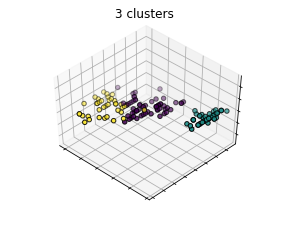

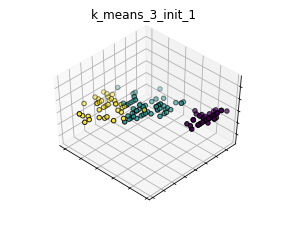

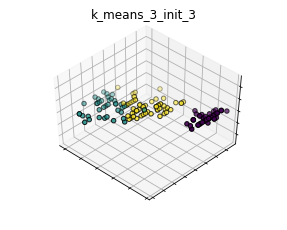

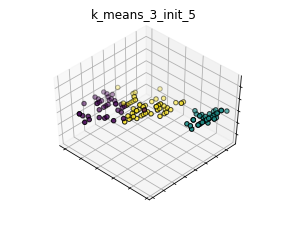

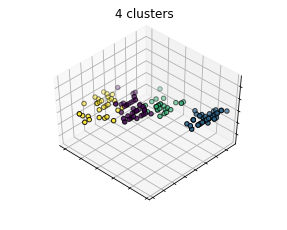

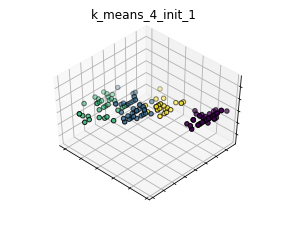

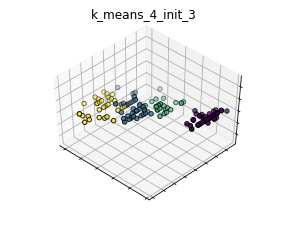

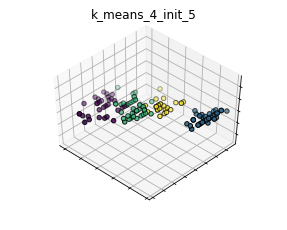

In [7]:
fignum = 1
titles = ['3 clusters', 'k_means_3_init_1', 'k_means_3_init_3', 'k_means_3_init_5', 
          '4 clusters', 'k_means_4_init_1', 'k_means_4_init_3', 'k_means_4_init_5']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    
    ## fit data
    est.fit(X)
    
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1
